In [ ]:
# Understanding the victim demographics of crimes in Los Angeles to identify groups most at risk

In [1]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Read in csv file 
cleaned_crime = pd.read_csv("Cleaned_Crime_Data.csv")
cleaned_crime.head()

,Unnamed: 0,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Location,Month,Day,Year,Lat,Lon
0,200648,03/11/2015,1600,Central,143,SHOPLIFTING - PETTY THEFT ($950 & UNDER),27.0,M,H,OTHER STORE,"(34.0481, -118.2507)",3,11,2015,34.0481,-118.2507
1,202598,07/08/2015,2355,Central,153,TRESPASSING,32.0,M,B,HOTEL,"(34.0467, -118.252)",7,8,2015,34.0467,-118.2520
2,205673,07/15/2015,1600,Central,162,"THEFT, PERSON",54.0,F,H,DEPARTMENT STORE,"(34.048, -118.2577)",7,15,2015,34.0480,-118.2577
3,409110,07/23/2015,715,Central,105,BURGLARY FROM VEHICLE,30.0,F,W,STREET,"(34.0688, -118.2333)",7,23,2015,34.0688,-118.2333
4,490916,07/17/2015,1510,Central,111,DOCUMENT FORGERY / STOLEN FELONY,44.0,F,O,BANK,"(34.0604, -118.2393)",7,17,2015,34.0604,-118.2393


In [20]:
# Pulling the values of the Victim Sex column to see the data breakdown 
vs = cleaned_crime["Victim Sex"].value_counts()
vs

M    246599
F    236768
X      4928
H        17
Name: Victim Sex, dtype: int64

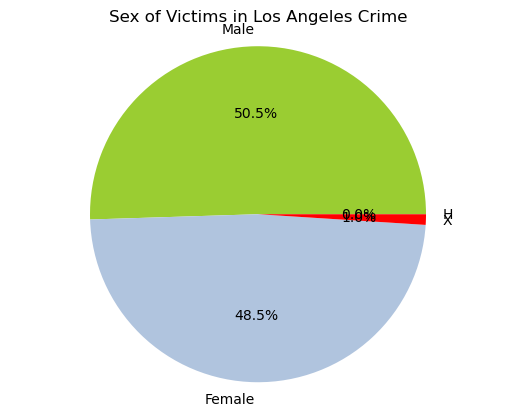

In [21]:
# Plotting the victim sex in a pie chart using pyplot
# X or H could be unknown or sex not applicable? 
plt.pie(vs, labels=["Male", "Female", "X", "H"], colors=["yellowgreen", "lightsteelblue", "red", "indigo"], radius=5, autopct="%.1f%%")
plt.axis("equal")
plt.title("Sex of Victims in Los Angeles Crime")
plt.show()

In [14]:
# Creating individual DataFrames for all the crimes on focus 
# Identifying crime descriptions in a list for for loop
crimes = ["CRIMINAL HOMICIDE", "ARSON", "KIDNAPPING", "THROWING OBJECT AT MOVING VEHICLE", "PICKPOCKET"]

# Creating empty list to hold crime dataframes for each crime of focus 
crime_list = []

# For loop creating each DataFrame
for crime in crimes: 
    crime_df = cleaned_crime[(cleaned_crime["Crime Code Description"] == crime)]
    crime_list.append(crime_df)
crime_list

[        Unnamed: 0 Date Occurred  Time Occurred    Area Name  \
 630         995989    01/06/2015           1047      Central   
 1173        996581    02/01/2015           2001      Central   
 1285        996706    02/07/2015           1940      Central   
 3269        998966    05/09/2015           1121      Central   
 3754        999532    03/23/2015           1346      Central   
 ...            ...           ...            ...          ...   
 485797     1581312    09/03/2017           1040  77th Street   
 486080     1581637    08/28/2017              2       Newton   
 486403     1582032    09/03/2017           1815      Pacific   
 486604     1582266    08/23/2017           1946  N Hollywood   
 487538     1583372    01/12/2017           1900      Mission   
 
         Reporting District Crime Code Description  Victim Age Victim Sex  \
 630                    165      CRIMINAL HOMICIDE        34.0          M   
 1173                   192      CRIMINAL HOMICIDE        48.0  

In [15]:
# Criminal Homicide DataFrame
crim_hom_df = crime_list[0]
crim_hom_df.head()

,Unnamed: 0,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Location,Month,Day,Year,Lat,Lon
630,995989,01/06/2015,1047,Central,165,CRIMINAL HOMICIDE,34.0,M,B,SIDEWALK,"(34.0433, -118.2488)",1,6,2015,34.0433,-118.2488
1173,996581,02/01/2015,2001,Central,192,CRIMINAL HOMICIDE,48.0,F,O,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","(34.0407, -118.268)",2,1,2015,34.0407,-118.2680
1285,996706,02/07/2015,1940,Central,111,CRIMINAL HOMICIDE,48.0,M,B,PARKING LOT,"(34.0606, -118.2439)",2,7,2015,34.0606,-118.2439
3269,998966,05/09/2015,1121,Central,112,CRIMINAL HOMICIDE,58.0,M,W,SIDEWALK,"(34.0541, -118.2417)",5,9,2015,34.0541,-118.2417
3754,999532,03/23/2015,1346,Central,158,CRIMINAL HOMICIDE,60.0,F,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","(34.0395, -118.2405)",3,23,2015,34.0395,-118.2405


In [16]:
# Arson DataFrame
arson_df = crime_list[1]
arson_df.head()

,Unnamed: 0,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Location,Month,Day,Year,Lat,Lon
957,996346,01/24/2015,624,Central,195,ARSON,28.0,F,O,"VEHICLE, PASSENGER/TRUCK","(34.0341, -118.2591)",1,24,2015,34.0341,-118.2591
2276,997832,03/23/2015,1210,Central,158,ARSON,28.0,F,B,SIDEWALK,"(34.0395, -118.2405)",3,23,2015,34.0395,-118.2405
2494,998082,04/01/2015,246,Central,131,ARSON,34.0,M,W,OFFICE BUILDING/OFFICE,"(34.0569, -118.254)",4,1,2015,34.0569,-118.2540
2560,998162,04/06/2015,510,Central,163,ARSON,21.0,M,A,OTHER STORE,"(34.0438, -118.2547)",4,6,2015,34.0438,-118.2547
2805,998437,04/17/2015,2120,Central,176,ARSON,35.0,F,W,SIDEWALK,"(34.0408, -118.2511)",4,17,2015,34.0408,-118.2511


In [17]:
# Kidnapping DataFrame 
knap_df = crime_list[2]
knap_df.head()

,Unnamed: 0,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Location,Month,Day,Year,Lat,Lon
58,995317,01/27/2015,1715,Central,158,KIDNAPPING,29.0,F,W,SIDEWALK,"(34.0395, -118.2405)",1,27,2015,34.0395,-118.2405
405,995716,09/28/2015,2230,Central,111,KIDNAPPING,23.0,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","(34.0591, -118.2412)",9,28,2015,34.0591,-118.2412
730,996103,01/12/2015,1600,Central,112,KIDNAPPING,28.0,M,B,STREET,"(34.057, -118.2437)",1,12,2015,34.0570,-118.2437
1411,996841,02/12/2015,1800,Central,105,KIDNAPPING,40.0,M,H,SIDEWALK,"(34.071, -118.2302)",2,12,2015,34.0710,-118.2302
1615,997075,02/22/2015,220,Central,122,KIDNAPPING,29.0,M,H,STREET,"(34.0572, -118.2481)",2,22,2015,34.0572,-118.2481


In [18]:
# Throwing Object at Moving Vehicle DataFrame
vehicle_df = crime_list[3]
vehicle_df.head()

,Unnamed: 0,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Location,Month,Day,Year,Lat,Lon
999,996392,01/26/2015,735,Central,118,THROWING OBJECT AT MOVING VEHICLE,54.0,F,H,STREET,"(34.0695, -118.2273)",1,26,2015,34.0695,-118.2273
3149,998833,05/03/2015,430,Central,185,THROWING OBJECT AT MOVING VEHICLE,24.0,M,O,STREET,"(34.0409, -118.2574)",5,3,2015,34.0409,-118.2574
5025,1000970,07/27/2015,1925,Central,135,THROWING OBJECT AT MOVING VEHICLE,51.0,F,A,STREET,"(34.0503, -118.247)",7,27,2015,34.0503,-118.2470
5026,1000971,07/27/2015,1925,Central,135,THROWING OBJECT AT MOVING VEHICLE,33.0,M,O,STREET,"(34.0503, -118.247)",7,27,2015,34.0503,-118.2470
5027,1000972,07/27/2015,1925,Central,135,THROWING OBJECT AT MOVING VEHICLE,27.0,M,A,STREET,"(34.0503, -118.247)",7,27,2015,34.0503,-118.2470


In [19]:
# Pickpocket DataFrame
pickpocket_df = crime_list[4]
pickpocket_df.head()

,Unnamed: 0,Date Occurred,Time Occurred,Area Name,Reporting District,Crime Code Description,Victim Age,Victim Sex,Victim Descent,Premise Description,Location,Month,Day,Year,Lat,Lon
14,983216,10/03/2015,1300,Central,185,PICKPOCKET,19.0,F,H,SIDEWALK,"(34.0383, -118.254)",10,3,2015,34.0383,-118.2540
240,995524,05/31/2015,240,Central,164,PICKPOCKET,28.0,F,H,BAR/COCKTAIL/NIGHTCLUB,"(34.046, -118.2509)",5,31,2015,34.0460,-118.2509
255,995541,01/18/2015,1300,Central,181,PICKPOCKET,49.0,M,W,OTHER BUSINESS,"(34.0431, -118.2692)",1,18,2015,34.0431,-118.2692
776,996152,01/15/2015,1155,Central,165,PICKPOCKET,19.0,F,W,SIDEWALK,"(34.0439, -118.2479)",1,15,2015,34.0439,-118.2479
982,996372,01/25/2015,730,Central,154,PICKPOCKET,21.0,F,O,SIDEWALK,"(34.046, -118.2509)",1,25,2015,34.0460,-118.2509


In [62]:
# Getting the victim sexes for pie chart plotting from each DataFrame
crim_hom_vs = crim_hom_df["Victim Sex"].value_counts()
arson_vs = arson_df["Victim Sex"].value_counts()
knap_vs = knap_df["Victim Sex"].value_counts()
vehicle_vs = vehicle_df["Victim Sex"].value_counts()
pickpocket_vs = pickpocket_df["Victim Sex"].value_counts()

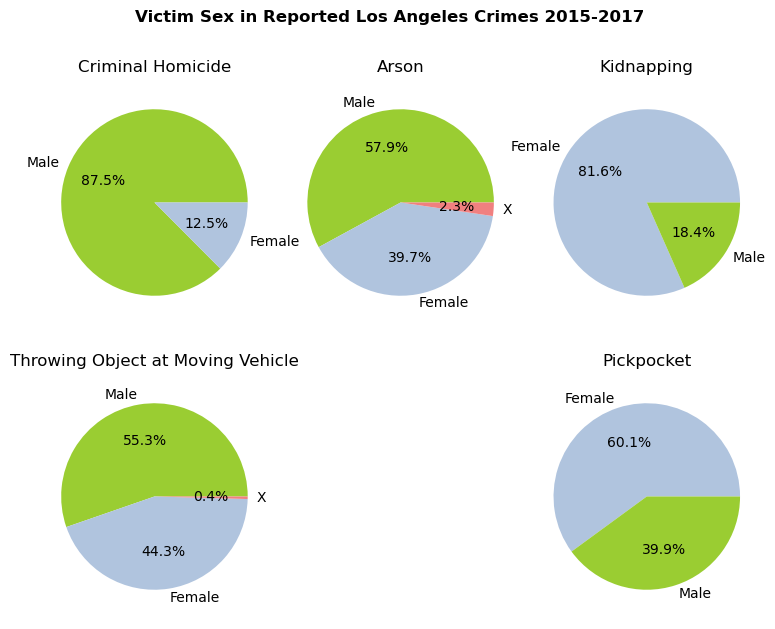

In [63]:
# Plotting the victim sex for each of the focus crimes in one plot 
# Creating and titling main plot 
fig = plt.figure(figsize=(9,7))
fig.suptitle("Victim Sex in Reported Los Angeles Crimes 2015-2017", fontweight="bold")

# Criminal Homicide Subplot 
cr1 = plt.subplot2grid((2,3), (0,0))
plt.pie(crim_hom_vs, labels=["Male", "Female"], colors=["yellowgreen","lightsteelblue"], autopct="%.1f%%")
plt.title("Criminal Homicide")
plt.axis("equal")

# Arson Subplot
cr2 = plt.subplot2grid((2,3), (0,1))
plt.pie(arson_vs, labels=["Male", "Female", "X"], colors=["yellowgreen","lightsteelblue", "lightcoral"], autopct="%.1f%%")
plt.title("Arson")
plt.axis("equal")

# Kidnapping Subplot
cr3 = plt.subplot2grid((2,3), (0,2))
plt.pie(knap_vs, labels=["Female", "Male"], colors=["lightsteelblue","yellowgreen"], autopct="%.1f%%")
plt.title("Kidnapping")
plt.axis("equal")

# Throwing Object at Moving Vehicle Subplot
cr4 = plt.subplot2grid((2,3), (1,0))
plt.pie(vehicle_vs, labels=["Male", "Female", "X"], colors=["yellowgreen","lightsteelblue", "lightcoral"], autopct="%.1f%%")
plt.title("Throwing Object at Moving Vehicle")
plt.axis("equal")

# Pickpocket Subplot
cr5 = plt.subplot2grid((2,3), (1,2))
plt.pie(pickpocket_vs, labels=["Female", "Male"], colors=["lightsteelblue","yellowgreen"], autopct="%.1f%%")
plt.title("Pickpocket")
plt.axis("equal")

plt.show()

In [ ]:
# Bar plots on Victim Age & Summary Statistics 